## **Erosion**

In [25]:
#dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erosion(image_file):
  #read the image
  image = cv2.imread(image_file,0)
  
  #size of the image
  m = image.shape[0]
  n = image.shape[1]

  #define the structuring element
  k = 3
  structuring_kernel = np.ones((3,3), dtype=np.uint8)

  #add padding to matrix
  image_padding = np.pad(array=image, pad_width=1, mode='constant')
  padding_shape = image_padding.shape
  height_r, weight_r = (padding_shape[0] - image.shape[0]), (padding_shape[1] - image.shape[1])

  #create a new image with given sizes
  eroded_image = np.zeros((m,n), dtype=np.uint8) 

  #iteratively go through each element and erode
  for i in range(padding_shape[0] - height_r):
    for j in range(padding_shape[0] - weight_r):
      sub_matrices = image_padding[i:(i + k), j:(j + k)]
      eroded_image[i,j]= np.min(sub_matrices)
  #print the result
  print("  Eroded result  ")
  plt.imshow(eroded_image)  

  return eroded_image
      

  Eroded result  


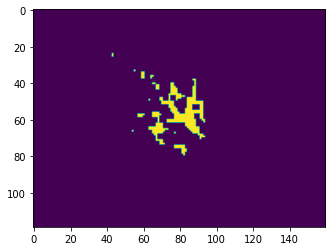

In [2]:
eroded = erosion("/content/gun-2.bmp")

## **Dilation**

In [21]:
def dilation(image_file): #change the image_file to image_d when performing the opening
  #read the image
  image_d = cv2.imread(image_file,0)

  #size of the image
  a, z = image_d.shape

  #define the structuring element
  structuring_element_dilation = np.array([[0,1,0], [1,1,1],[0,1,0]])
  add = 1

  #create a new image with given sizes
  dilated_image = np.zeros((a,z), dtype=np.uint8)

  #iteratively go through each element and dilate
  for i in range(add, a-add):
    for j in range(add, z-add):
      sub_matrices_d = image_d[i-add:i+add+1, j-add:j+add+1]
      output_d = np.dot(sub_matrices_d, structuring_element_dilation)
      dilated_image[i,j]= np.max(output_d)

  #print the result
  print("  Dilated result  ")
  plt.imshow(dilated_image)
  
  return dilated_image

  Dilated result  


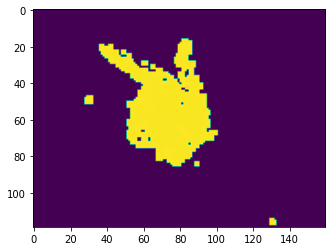

In [7]:
dialated = dilation("/content/gun-2.bmp")

## **Opening and Closing**

  Eroded result  


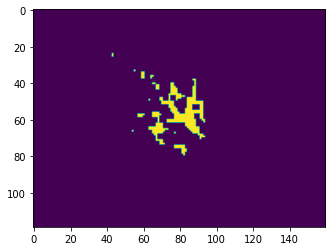

In [14]:
#first erode the image
eroded_image = erosion("/content/gun-2.bmp")

  Dilated result  


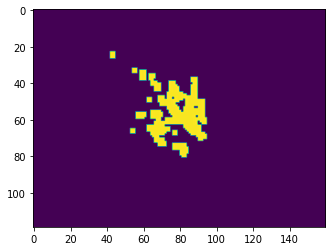

In [22]:
#then dilate the image in order to perform the opening operation
#comment the image reading part in dilation function to be able get the opening image
opening = dilation(eroded_image)

  Eroded result  


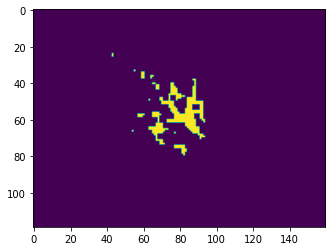

In [26]:
#then dilate on the opening results which gives closing operation
#comment the image reading part in erosion function to be able get the closing part
closing = erosion(opening)

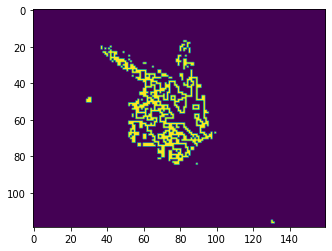

In [27]:
# def boundary(erosion, dilation,image_file, image):
image = cv2.imread("/content/gun-2.bmp",0)
boundary = image - eroded_image
plt.imshow(boundary)